In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("white")

In [3]:
gdp = pd.read_csv ('../../dataset/Indicators/gdp.csv', encoding='unicode_escape')

In [4]:
gdp.head()

,time,close
0,1948-03-01T01:00:00+01:00,2.6
1,1948-06-01T01:00:00+01:00,4.6
2,1948-09-01T01:00:00+01:00,5.4
3,1948-12-01T01:00:00+01:00,3.9
4,1949-03-01T01:00:00+01:00,0.9


In [5]:
def cleaned_indicator(df): 
    df['time'] = df['time'].str.extract('(\d{4}-\d{2}-\d{2})', expand=True)
    df['time'] = pd.to_datetime(df["time"])
    df.set_index('time', inplace=True)
    df= df.reindex(pd.date_range(start=df.index.min(),
                                                  end=df.index.max(),
                                                  freq='1D'))
    df.interpolate(method='linear', inplace=True)
    df.index.names = ['Year']
    df = df[(df.index >= '1976-06-01') & (df.index <= '2022-11-02')]
    return df

In [6]:
gdp = cleaned_indicator(gdp)

In [7]:
def gdp_visualization(): 
    plt.plot(gdp, color= 'b')
    plt.title('USA Gross Domestic Product (GDP) YoY change', fontsize= 20)
    plt.xlabel('Year', fontsize= 20)
    plt.ylabel('GDP YoY change (%)', fontsize= 20)
    plt.style.use('seaborn')
    return plt.show()

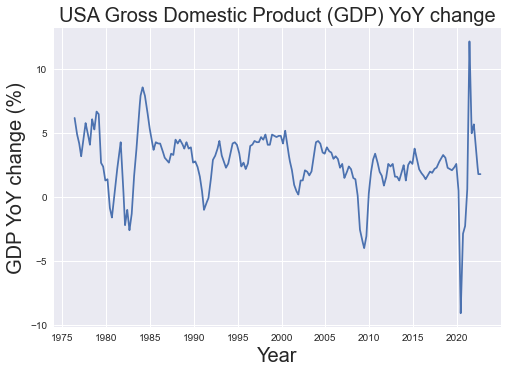

In [9]:
gdp_visualization()